In [17]:
#  Introduction 

# This notebook demonstrates the basic of Machine learning using the IRIS data model. 

# This is my hello world program in machine learning which I have compiled from numerous blogs and YouTube videos. 
# As mentioned earlier, everything mentioned here is learnt from blogs. 
# Additionally, some activities might not be relevant to the problem and has been added to know how is it done.

# Preliminary data analysis
# Visualizations
# Using different classification techniques and comparison




In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualization library
import matplotlib.pyplot as plt #data visualization library
from sklearn.datasets import load_iris #sklearn library with datasets

irisRaw = load_iris() #importing iris dataset

In [19]:
iris = pd.DataFrame(data= np.c_[irisRaw['data'], irisRaw['target']],
                     columns= irisRaw['feature_names'] + ['target'])

# In case you wish to use the data set provided by Kaggle directly, you just need to uncomment the below code

#iris = pd.read_csv("../input/Iris.csv") # load the dataset
#iris.drop('Id',axis=1,inplace=True) # Drop id column
#iris['Species'] = iris['Species'].map({'Iris-setosa':0.0
#                                       ,'Iris-versicolor':1.0,'Iris-virginica':2.0}) # Replace values in species column
#iris.rename(columns = {'Species':'target'}, inplace = True) # Rename column as target

In [7]:
# Lets take a look at couple of rows and few basic statistics for the dataset 

print("Top 5 rows\n")
print(iris.head(n=5))
print("\nStatistics for the dataset\n")
print(iris.describe())
print("\nStructure of data (rows,columns)\n")
print(iris.shape)

Top 5 rows

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

Statistics for the dataset

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.8000

In [20]:
# Analyzing the data description

# Inference from looking at the head

# There are 5 columns. Target column is what we want to predict and the other 4 columns, i.e. features is what we will be using to predict the target, i.e. labels
# Each row is also known as tuple
# Inference from the statistics

# We see the mean, standard deviation, minimum, maximum and 25%,50%,75% values
# Inference from shape

# There are 150 rows and 5 columns
# Let's take a look at unique values in the target column


iris['target'].unique()



array([0., 1., 2.])

In [21]:
# We have three unique values. You can use irisRaw['target_names'] to check the names of the flowers. We have three flowers setosa, versicolor and virginica which maps to numbers 0, 1 and 2 respectively. Given that names of the flowers doesn't really matter, I will be referring to the flowers using the number in the rest of the discussion.

# Let's see how to rename the columns

iris.columns = ['SPL','SPW','PTL','PTW','target']
iris.head(1)


,SPL,SPW,PTL,PTW,target
0,5.1,3.5,1.4,0.2,0.0


In [22]:
# That was pretty straight forward. Next as a part of the data cleansing process, we need to check if there are any missing values

print("Do null value exist")
print(pd.isnull(iris).any())
print("\n\n Count of null values")
print(pd.isnull(iris).sum())

Do null value exist
SPL       False
SPW       False
PTL       False
PTW       False
target    False
dtype: bool


 Count of null values
SPL       0
SPW       0
PTL       0
PTW       0
target    0
dtype: int64


In [11]:
# We can see that the data does not contain any null or missing data. This will generally not be the case in most real world problems.

# Next, we start the quest to evaluate relationship between features across the labels which might help with the overall classification problem. We'll start by grouping the data set into different classes and describing the data.

labelGroups = iris.groupby('target')

for name, group in labelGroups:
    # print the name of the group
    print("\n\n",name)
    # print data for that group
    print(group.describe())



 0.0
            SPL        SPW        PTL        PTW  target
count  50.00000  50.000000  50.000000  50.000000    50.0
mean    5.00600   3.428000   1.462000   0.246000     0.0
std     0.35249   0.379064   0.173664   0.105386     0.0
min     4.30000   2.300000   1.000000   0.100000     0.0
25%     4.80000   3.200000   1.400000   0.200000     0.0
50%     5.00000   3.400000   1.500000   0.200000     0.0
75%     5.20000   3.675000   1.575000   0.300000     0.0
max     5.80000   4.400000   1.900000   0.600000     0.0


 1.0
             SPL        SPW        PTL        PTW  target
count  50.000000  50.000000  50.000000  50.000000    50.0
mean    5.936000   2.770000   4.260000   1.326000     1.0
std     0.516171   0.313798   0.469911   0.197753     0.0
min     4.900000   2.000000   3.000000   1.000000     1.0
25%     5.600000   2.525000   4.000000   1.200000     1.0
50%     5.900000   2.800000   4.350000   1.300000     1.0
75%     6.300000   3.000000   4.600000   1.500000     1.0
max     7

<AxesSubplot:>

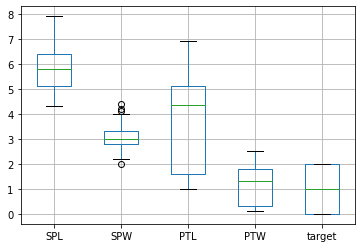

In [23]:
# That's quite a lot of information. However, it's too difficult to understand the feature relationships. Let's check if we can use some visualization to represent it better.

## Visualizations ##


iris.boxplot(return_type='axes')


target
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SPL, dtype: object

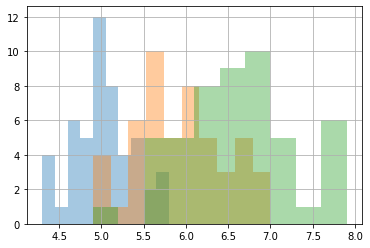

In [24]:
# Features do not overlap, this might be a good sign. We'll now take a look at the histogram for the dataset


labelGroups['SPL'].hist(alpha=0.4)


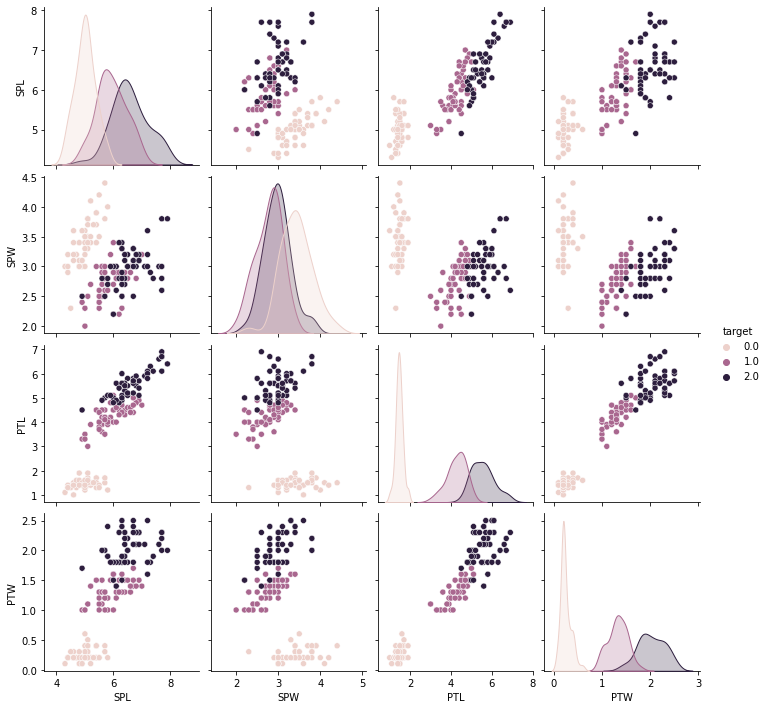

In [14]:
# Although the histogram tells us how a feature relates to the labels it doesn't help compare with other features.
# We'll try plotting the scatter plot from the seaborn package over here. There is a [scatter plot][1] available in pandas.tools.plotting package as well. I will be using the one from seaborn since it shows relationship with the target class as well.

sns.pairplot(iris, hue="target")


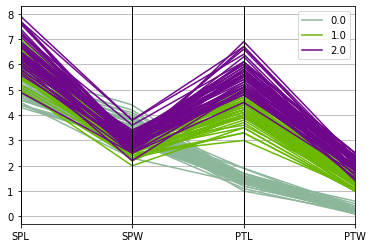

In [25]:
# Are there any visualizations that can be used to find out which feature distinguishes class 2. We'll be looking at the [parallel_coordinates][1] plot.

from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "target")
plt.show()

# That didn't help much. It provided me the same information as earlier, that class 0 can be easily distinguished from 1 and 2. Let's take a look at [swarmplot][1]  for the dataset



/Users/u823213/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/u823213/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/u823213/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/u823213/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


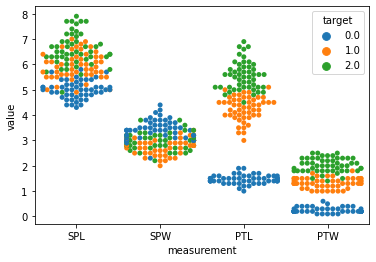

In [16]:
irisUnPvt = pd.melt(iris, "target", var_name="measurement")
sns.swarmplot(x="measurement", y="value", hue="target", data=irisUnPvt)
plt.show()

# This further confirms that we can use petal length and petal width to isolate class 0. However, another interesting observations is that apart from a few outliers, petal length and petal width can be used to classify between classes 1 and 2 as well. This is by far one of my favorite visualizations.

# Another interesting command to note over here is pandas.melt. For people who come from SQL background, melt command can be used to unpivot the data. For people who don't know what unpivot is, it means converting columns to rows. We'll print the top few rows to understand this better.


In [27]:
print(irisUnPvt.head(10),'\n\n')
print(irisUnPvt['measurement'].unique())

   target measurement  value
0     0.0         SPL    5.1
1     0.0         SPL    4.9
2     0.0         SPL    4.7
3     0.0         SPL    4.6
4     0.0         SPL    5.0
5     0.0         SPL    5.4
6     0.0         SPL    4.6
7     0.0         SPL    5.0
8     0.0         SPL    4.4
9     0.0         SPL    4.9 


['SPL' 'SPW' 'PTL' 'PTW']


In [28]:
pearson = iris.corr(method='pearson')
print(pearson,"\n\n")
# assume target attr is the last, then remove corr with itself
corr_without_target = pearson.iloc[-1][:-1]
# attributes sorted from the most predictive
corr_without_target.sort_values(inplace=True)
print("Correlation of feature with the target")
print(corr_without_target)


# From the data, we can see that sepal length has a pretty high correlation with petal length and petal width.

# Looking at correlation with the target, something isn't quiet right over here. -0.41 shouldn't be coming on the top over here. We want to sort by their absolute values instead



             SPL       SPW       PTL       PTW    target
SPL     1.000000 -0.117570  0.871754  0.817941  0.782561
SPW    -0.117570  1.000000 -0.428440 -0.366126 -0.426658
PTL     0.871754 -0.428440  1.000000  0.962865  0.949035
PTW     0.817941 -0.366126  0.962865  1.000000  0.956547
target  0.782561 -0.426658  0.949035  0.956547  1.000000 


Correlation of feature with the target
SPW   -0.426658
SPL    0.782561
PTL    0.949035
PTW    0.956547
Name: target, dtype: float64


In [29]:
corr_without_target[abs(corr_without_target).argsort()[::-1]]

# We knew that petal width and petal length has very high correlation with the label, However, we can see that there is a good amount of correlation with sepal length as well. I have used pearsons correlation to get the information, however you can use spearman or kendall correlations as well based on your needs.

PTW    0.956547
PTL    0.949035
SPL    0.782561
SPW   -0.426658
Name: target, dtype: float64

<ipython-input-30-b0e561459793>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(pearson, dtype=np.bool)


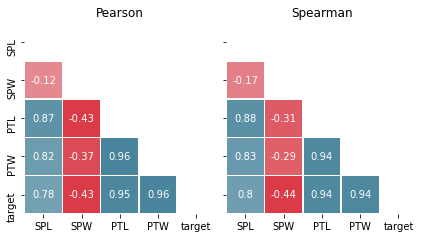

In [30]:
# Next we'll see if there is a better way to get visualize the correlation matrix.

# Set up the matplotlib figure
f, ax = plt.subplots(1,2,sharey=True,sharex=True)


# Generate a custom diverging colormap
cmap = sns.diverging_palette(10,225, as_cmap=True)

# clear the upper half of the matrix
mask = np.zeros_like(pearson, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set title for the left section
ax.flat[0].set_title("Pearson")
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pearson, mask=mask, cmap=cmap, vmax=1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar= False, ax=ax.flat[0],annot=True)

# Set title for the right section
ax.flat[1].set_title("Spearman")
scorrelation = iris.corr(method='spearman')
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(scorrelation, mask=mask, cmap=cmap, vmax=1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar= False, ax=ax.flat[1],annot=True)

f.tight_layout()
plt.show()

# That looks like a pretty good way to visualize the correlation matrix. 


Amount of variance explained by each component
[0.92461872 0.05306648 0.01710261]


 Amount of variance considered from each components
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]


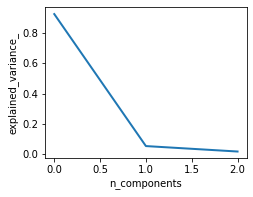

In [32]:
# Before we move on to the next section, we'll take a brief look at how to perform Principal Component Analysis (PCA).

# Principal Component Analysis (in brief)
# PCA is a feature reduction technique. Feature reduction is not to be confused with feature elimination. Complexity of a classification model increases if there are large number of features. Although the current example has only 4 features, real life ML problems will have features much more than that. In such cases, it is better to perform PCA to reduce the number of features. Pretty good explanation of what is PCA can be found over here. PCA can also be used as an unsupervised learning technique to derive early inference of the data. Let's start with PCA now.


from sklearn.decomposition import PCA # Import PCA from the library
pca = PCA(n_components=3) # Reduce the number of components to three.
pca.fit(iris[['SPL','SPW','PTL','PTW']])

print("Amount of variance explained by each component")
print(pca.explained_variance_ratio_)
print("\n\n","Amount of variance considered from each components")
print(pca.components_)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

# As we can see, PCA gave three outputs. PCA1 explains approximately 90% of the variance. Also if you check PCA1 has considered maximum amount of variance from the third feature that is petal length. You can apply dimensionality reduction to input data set using the transform method and use it for rest of the classification purposes. Lets finally move on to classification now.



In [33]:
# Classification
# In order to perform classification, we will be splitting the data into two parts, called as test and train data. We'll be using packages available in scikit learn itself to perform these operations.


from sklearn.model_selection import train_test_split # import package to splid the data

X_train, X_test, y_train, y_test = train_test_split(irisRaw.data, irisRaw.target
                                                    , test_size=0.2, random_state=4) 
# We'll keep aside 20% for testing. Random state ensures repeatability.
# I have used the raw data for simplicity over here. 
# Alternatively, below approach can be used to get data from pandas data frame

#X_train, X_test, y_train, y_test = train_test_split(
#    iris[['SPL','SPW','PTL','PTW']], iris.iloc[:,4]
#    , test_size=0.6, random_state=4

print("Shape of training data \tInput:",X_train.shape,"\tExpected output:", y_train.shape)
print("Shape of test data   \tInput:",X_test.shape," \tExpected output:", y_test.shape)


Shape of training data 	Input: (120, 4) 	Expected output: (120,)
Shape of test data   	Input: (30, 4)  	Expected output: (30,)


In [34]:
# Next, we'll instantiate K-nearest neighbor Classifier. We'll be setting the number of neighbors to a random value of 20.
# We can evaluate the result obtained using classification report function


from sklearn.neighbors import KNeighborsClassifier # Import KNeighbour classifier
import sklearn.metrics as mtr # Package to derive and report metrics 

knn = KNeighborsClassifier(n_neighbors=20) # Instantiate the model using the value of n as 13
knn.fit(X_train,y_train) # Train the model using the training data set

y_true, y_pred = y_test, knn.predict(X_test) # Predict values for the test data set
print(mtr.classification_report(y_true, y_pred)) # Print the classification report

# We have performed classification and we have a mean precision and recall of 93%. There are excellent videos available for these metrics on YouTube. For continuity assume that a recall greater than 60% is a good number and the classifier is not making random guesses.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.80      0.80      0.80         5
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.93      0.93      0.93        30



In [35]:
# We'll create a small function to plot the confusion matrix as well. I have performed few edits in the code sample provided by sklearn.

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i,format(cm[i, j],'.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.8        0.2       ]
 [0.         0.11111111 0.88888889]]


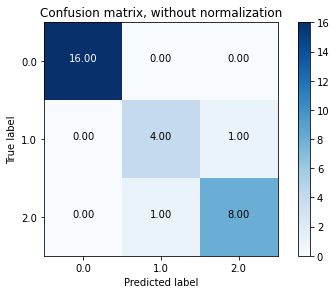

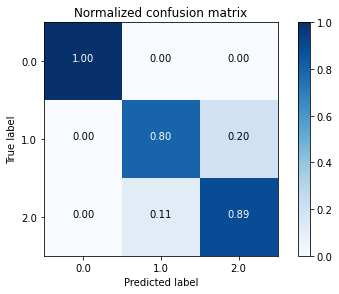

In [36]:
# Get the classesto plot the values
class_names = iris['target'].unique()

# Compute confusion matrix
cnf_matrix = mtr.confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [37]:
# Our classifier is doing pretty well. It is able to predict 100% of class 0, 80% of class 1 and close to 90% of class 2.

# Earlier we selected a random value for the number of neighbors. The input parameters apart from the dataset that are to be passed to a model are called as hyperparameters, in this case the number of neighbours. We need to find the optimal value for a hyperparameter so that a model can perform efficiently. There are two approaches to solve this:

# Repeat the above code n times with different hyperparameters
# Use a for loop, to execute the above code for different hyperparameters. SciKit learn provides approach 2 mentioned above as a module GridSearchCV. There is an excellent tutorial by Kevin Markham explaining this in detail. Let's find the the optimal value for number of neighbors in this problem.

In [38]:
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
k_range = list(range(1, 25))

knn = KNeighborsClassifier()

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# instantiate the grid
# Optimize for the best value of recall score
grid = GridSearchCV(knn, param_grid, cv=10, scoring=mtr.make_scorer(mtr.recall_score,average='micro'))

# fit the grid with data
grid.fit(X_train, y_train)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9833333333333332
{'n_neighbors': 12}
KNeighborsClassifier(n_neighbors=12)


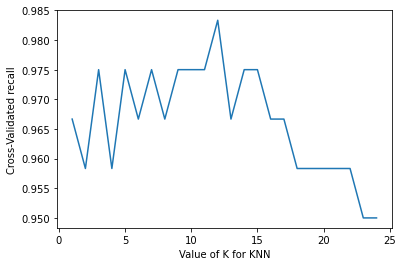

In [40]:
# If you examine the above output, you can see that the best recall achieved is 98% with number of neighbors as 10. I have created a scorer to optimize for recall. Lets check how the recall changes based on change in number of neighbors.


# create a list of the mean scores only
grid_mean_scores = grid.cv_results_['mean_test_score']

# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated recall')
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89         5
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30

Confusion matrix, without normalization
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]
Normalized confusion matrix
[[1.  0.  0. ]
 [0.  0.8 0.2]
 [0.  0.  1. ]]


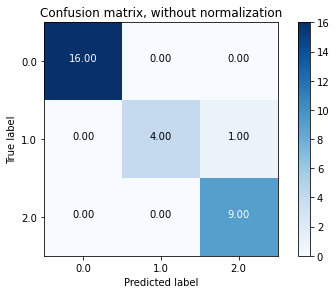

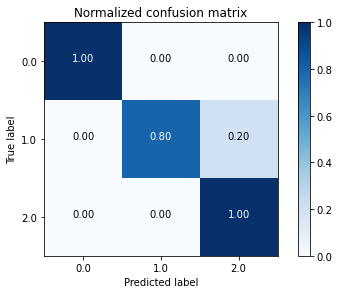

In [41]:
# As you can see above value of N peaks at 10 and then starts to slowly decline after 13. Let's try using n=10 for prediction and take a look at the metrics.


knn = KNeighborsClassifier(n_neighbors=10) # Create model with number of neighbours as 10
knn.fit(X_train,y_train) # Train the model
y_true, y_pred = y_test, knn.predict(X_test) # Predict the test data

# Evaluate results
print(mtr.classification_report(y_true, y_pred)) 


# Compute confusion matrix
cnf_matrix = mtr.confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [42]:
# That provided a significant improvement in the model. You can use the metrics to compare and evaluate different available models.

# I have included an additional section without detailed explanation. It contains examples of using a linear model (Logistic Regression) and Keras Neural Network to check if I can obtain better results


from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.utils import np_utils

# Make test and train set
X_train, X_test, y_train, y_test = train_test_split(irisRaw.data, irisRaw.target, 
                                                    test_size=0.5,
                                                    random_state=4)

################################
# Evaluate Logistic Regression
################################
lr = LogisticRegression(C=1e4)
lr.fit(X_train, y_train)
pred_y = lr.predict(X_test)



################################
# Evaluate Keras Neural Network
################################

# Make ONE-HOT
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))


train_y_ohe = one_hot_encode_object_array(y_train)
test_y_ohe = one_hot_encode_object_array(y_test)

# Initialize sequential model
model = Sequential()

# Stack layers
model.add(Dense(16,input_shape=(4,), 
                activation="tanh",
                kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))

# Create the model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

# Actual modelling
model.fit(X_train, train_y_ohe,batch_size=1, epochs=100,verbose=0)

# Evaluate the models
score, accuracy = model.evaluate(X_test, test_y_ohe, batch_size=16,verbose=0)
print("Linear regression Accuracy = {:.2f}".format(lr.score(X_test, y_test)))
print("Neural Network Score = {:.2f}".format(score))
print("Neural Network Accuracy = {:.2f}".format(accuracy))

ModuleNotFoundError: No module named 'keras'